In [1]:
!pip uninstall shapely

Uninstalling Shapely-1.7.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Shapely-1.7.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.0


In [2]:
#Instalamos las librerias necesarias
!apt-get -qq install python-cartopy python3-cartopy
!pip install shapely --no-binary shapely



In [0]:
# Descargamos nuestro Base Data.

!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/MiniProyecto1/pointdata/Confirmados.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/MiniProyecto1/pointdata/Fatalidades.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/MiniProyecto1/pointdata/Sospechoso.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/MiniProyecto1/pointdata/temperatura_mundial_media.csv
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/MiniProyecto1/pointdata/Masinfectados.csv

In [0]:
#Importamos las librerias necesarias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs


In [0]:
# Creamos nuestros frame de cada data

data_confirm = pd.read_csv("Confirmados.csv", encoding='Latin-1')
data_confirm = pd.DataFrame(data_confirm)

data_fatal = pd.read_csv("Fatalidades.csv", encoding='Latin-1')
data_fatal = pd.DataFrame(data_fatal)

data_sos = pd.read_csv("Sospechoso.csv", encoding='Latin-1')
data_sos = pd.DataFrame(data_sos)

data_temperatura = pd.read_csv("temperatura_mundial_media.csv", encoding='Latin-1')
data_temperatura = pd.DataFrame(data_temperatura)

data_infectados = pd.read_csv("Masinfectados.csv", encoding='Latin-1')
data_infectados = pd.DataFrame(data_infectados)

In [6]:
#Casos confimados
confirmados_totales = data_confirm["Confirmado"].sum()
confirmados_totales

83208

In [7]:
#Casos Fatales
muertes_totales = data_fatal["Fatalidades"].sum()
muertes_totales

2769

In [8]:
#Casos Sospechosos
sospechosos_totales = data_sos["Sospechoso"].sum()
sospechosos_totales

1143

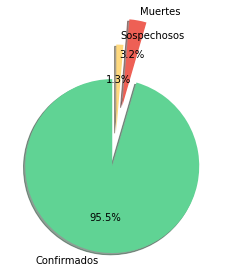

In [9]:
casos = [confirmados_totales, muertes_totales, sospechosos_totales]
names = ['Confirmados', 'Muertes', 'Sospechosos']
explode =[0.3, 0.4, 0.1]
colores = ["#60D394","#EE6055","#FFD97D"]
plt.pie(casos, labels=names, explode=explode,colors=colores,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("Coronavirus")
plt.show()


In [10]:
data_temperatura

,X,Y,temperatura
0,-4202310.777,1.854635e+07,-33.8
1,-4146651.032,1.854635e+07,-33.8
2,-4090991.287,1.854635e+07,-33.9
3,-4035331.541,1.854635e+07,-33.9
4,-3979671.796,1.854635e+07,-34.0
...,...,...,...
66878,-7486235.756,-7.410538e+06,8.8
66879,-7430576.010,-7.410538e+06,9.0
66880,-7597555.247,-7.508808e+06,8.6
66881,-7541895.501,-7.508808e+06,8.3


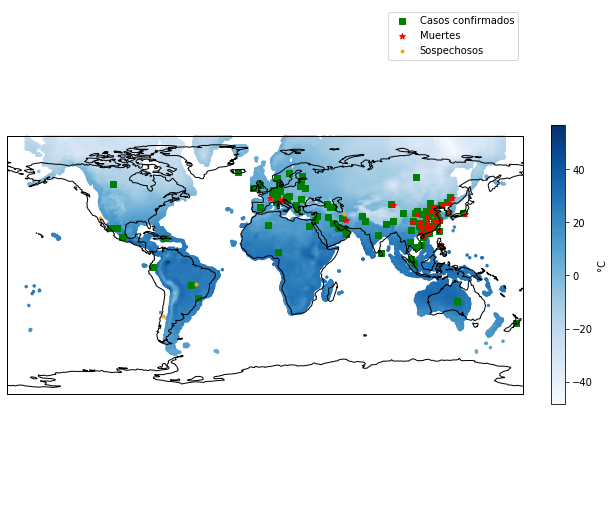

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

data_temperatura_x = data_temperatura["X"]/120000
data_temperatura_y = data_temperatura["Y"]/120000
temp = data_temperatura["temperatura"]

plt.scatter(data_temperatura_x,data_temperatura_y,s=6,c=temp,cmap="Blues")
plt.colorbar(label='°C',fraction = 0.025)
#ax.scatter(data_temperatura_x, data_temperatura_y, marker=".",c=temperatura,cmap="Blues")
ax.scatter(data_confirm["X"], data_confirm["Y"],marker=",",c="green", label="Casos confirmados")
ax.scatter(data_fatal["X"],data_fatal["Y"],marker="*" ,c="red", label="Muertes")
ax.scatter(data_sos["X"],data_sos["Y"],marker="." ,c="orange", label = ("Sospechosos"))
ax.set_xlim(-180,180)
ax.set_ylim(-180,180)
ax.coastlines()
plt.legend(loc=0)
plt.legend()
plt.savefig("mapa")
plt.show()

In [12]:
index = data_confirm["Confirmado"].nlargest(5)
index

13    65187
52     3526
23     1342
11     1271
20     1203
Name: Confirmado, dtype: int64

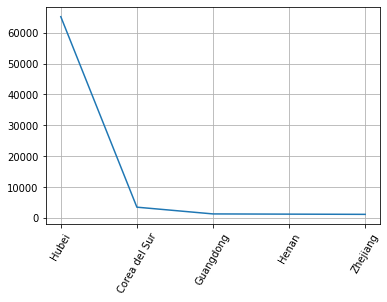

In [13]:
Paises = data_infectados["Pais"]
mapeado = range(len(Paises))

plt.xticks(mapeado, Paises, rotation=60)
plt.plot(data_infectados["Infectados"])
plt.grid()
plt.show()

In [14]:
masconfirmados_totales = data_infectados["Infectados"].sum()
confirmados_totales = confirmados_totales - masconfirmados_totales
masconfirmados_totales

72529

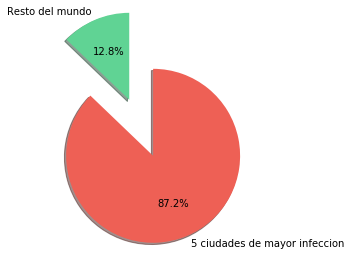

In [15]:
casos = [confirmados_totales, masconfirmados_totales]
names = ['Resto del mundo','5 ciudades de mayor infeccion']
explode =[0.3, 0.4]
colores = ["#60D394","#EE6055"]
plt.pie(casos, labels=names, explode=explode,colors=colores,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig("Coronavirus")
plt.show()


In [0]:

def graficar(pais1_lon, pais1_lat, pais2_lon, pais2_lat, nombre1,nombre2):
  plt.plot([pais1_lon, pais2_lon], [pais1_lat, pais2_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

  plt.plot([pais1_lon, pais2_lon], [pais1_lat, pais2_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

  plt.text(pais1_lon - 3, pais1_lat - 12, nombre1,
         horizontalalignment='right',
         transform=ccrs.Geodetic())

  plt.text(pais2_lon + 3, pais2_lat - 12, nombre2,
         horizontalalignment='left',
         transform=ccrs.Geodetic())
  
  
  #
  
#ax = fig.add_subplot(122,projection=ccrs.PlateCarree())
  #ax.plot(np.random.rand(10))
  #
 # plt.savefig(nombre1+"-"+nombre2)
  #plt.show()



In [0]:

wuhan_lon,wuhan_lat=114.2666702, 30.5833302
tail_lon,tail_lat=100, 15
japon_lon, japon_lat=138.2529297,36.2048225
bejing_lon, bejing_lat=116,39
wa_lon,wa_lat=-77.01 , 38.9
italy_lon,italy_lat= 12.8333000,42.8333000
france_lon,france_lat=2.2137489, 46.2276382
filipinas_lon,filipinas_lat=122,13
mexico_lon, mexico_lat= -102.5527878, 23.6345005


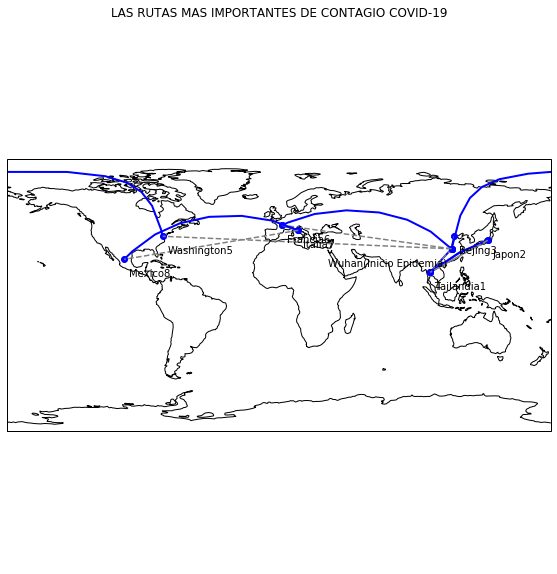

In [102]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1,
                 projection=ccrs.PlateCarree())


ax.set_xlim(-180,180)
ax.set_ylim(-180,180)
ax.coastlines()


#wuhan-Tailandia
graficar(wuhan_lon,wuhan_lat,tail_lon, tail_lat, 'Wuhan(Inicio Epidemia)', 'Tailandia1')
#Tailandia - Japon
graficar(tail_lon,tail_lat,japon_lon, japon_lat, '', 'Japon2')
#wuhan-Bejing
graficar(wuhan_lon,wuhan_lat,bejing_lon, bejing_lat, '', 'Bejing3')
#japon-Tailandia
graficar(japon_lon,japon_lat,tail_lon, tail_lat, '', '4')
#wuhan-whasington
graficar(wuhan_lon,wuhan_lat,wa_lon, wa_lat, '', 'Washington5')
#wuhan-Francia
graficar(wuhan_lon,wuhan_lat,france_lon, france_lat, '', 'Francia6')
#Francia-italia
graficar(france_lon,france_lat,italy_lon, italy_lat, '', 'Italia7')
#Italia-Mexico
graficar(italy_lon,italy_lat,mexico_lon, mexico_lat, '', 'Mexico8')
plt.title("LAS RUTAS MAS IMPORTANTES DE CONTAGIO COVID-19")
plt.savefig("Contagio")
plt.show()
